In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\deep learning\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
dff = df[~df['TotalCharges'].isnull()]

In [10]:
dff.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


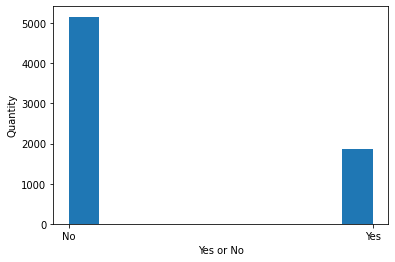

In [11]:
plt.hist(dff['Churn'])
plt.xlabel('Yes or No')
plt.ylabel('Quantity')
plt.show()

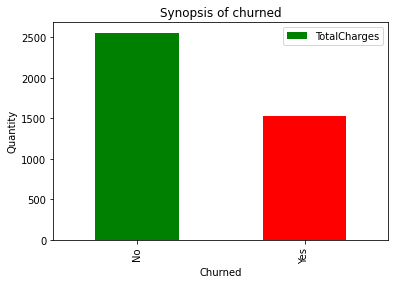

In [12]:
df.groupby('Churn')['TotalCharges'].mean().plot.bar(color = ['green','red'])
plt.xlabel('Churned')
plt.ylabel('Quantity')
plt.legend()
plt.title('Synopsis of churned')
plt.show()

In [13]:
yes = dff[dff['Churn']=='Yes'].tenure
no = dff[dff['Churn']=='No'].tenure

Histogram for the tenure

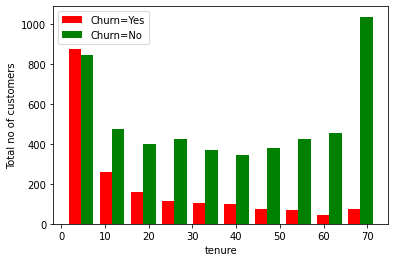

In [14]:
plt.hist([yes,no],color = ['red','green'],label = ['Churn=Yes','Churn=No'])
plt.xlabel('tenure')
plt.ylabel('Total no of customers')
plt.legend()
plt.show()

Histogram for the Total amount

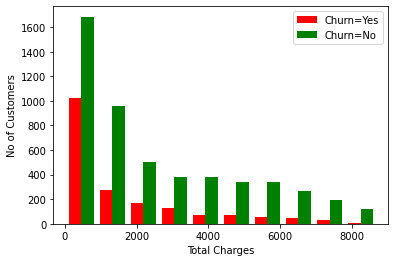

In [15]:
plt.hist([dff[dff['Churn']=='Yes'].TotalCharges,dff[dff['Churn']=='No'].TotalCharges],color = ['red','green'],label = ['Churn=Yes','Churn=No'])
plt.xlabel('Total Charges')
plt.ylabel('No of Customers')
plt.legend()
plt.show()

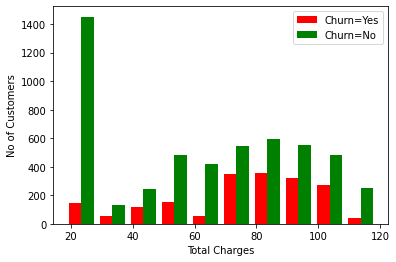

In [16]:
plt.hist([dff[dff['Churn']=='Yes'].MonthlyCharges,dff[dff['Churn']=='No'].MonthlyCharges],color = ['red','green'],label = ['Churn=Yes','Churn=No'])
plt.xlabel('Total Charges')
plt.ylabel('No of Customers')
plt.legend()
plt.show()

In [17]:
for i in dff:
    if dff[i].dtype=='O':
        print(f'{i} : {dff[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
for i in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    dff[i].replace('No internet service','No',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\3807429653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[i].replace('No internet service','No',inplace=True)


In [19]:
dff['MultipleLines'].replace('No phone service','No',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\2892951526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['MultipleLines'].replace('No phone service','No',inplace=True)


In [20]:
for i in dff:
    if dff[i].dtype=='O':
        print(f'{i} : {dff[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [22]:
l = []
for i in dff:
    if dff[i].dtype =='O' and len(dff[i].unique())>2:
        l.append(i)

In [23]:
label = LabelEncoder()
for i in dff:
    if dff[i].dtype=='O' and i not in l:
        dff[i] = label.fit_transform(dff[i])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\3108055349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[i] = label.fit_transform(dff[i])


In [24]:
df2 = pd.get_dummies(data = dff,columns = l,drop_first = True)

In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
301,0,1,0,0,4,1,1,0,0,0,0,1,1,1,95.45,396.10,1,1,0,0,0,0,1,0
3296,0,0,0,0,24,1,0,0,0,1,0,0,0,1,49.30,1233.25,0,0,0,0,0,1,0,0
6988,0,0,1,1,23,1,1,0,1,0,1,1,0,1,69.50,1652.10,0,0,0,0,0,1,0,0
4130,0,0,0,0,10,0,0,0,1,0,1,0,0,0,36.25,374.00,0,0,0,0,0,0,1,0
2401,1,1,0,1,11,1,0,0,1,0,1,0,0,1,54.55,601.25,0,0,0,0,0,0,1,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
col_scale = ['tenure','MonthlyCharges','TotalCharges']

In [28]:
scaler = MinMaxScaler()
df2[col_scale] = scaler.fit_transform(df2[col_scale])

In [29]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,0,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,1,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,0,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,1,0,0,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
y = df2['Churn']
df2.drop('Churn',axis = 1,inplace=True)

In [31]:
x = df2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU

In [37]:
classifier = Sequential()

In [38]:
classifier.add(Dense(units = 20,activation = 'relu',kernel_initializer='glorot_uniform',input_dim = 23))

In [39]:
classifier.add(Dense(units=10,activation = 'relu',kernel_initializer='glorot_uniform'))

In [40]:
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer = 'glorot_uniform'))

In [41]:
classifier.compile(optimizer='adamax',loss='binary_crossentropy',metrics = ['accuracy'])

In [42]:
classifier.fit(x_train,y_train,validation_split=0.33,epochs=100)

Epoch 1/100
99/99 [==============================] - 2s 8ms/step - loss: 0.6160 - accuracy: 0.7193 - val_loss: 0.5685 - val_accuracy: 0.7267
Epoch 2/100
99/99 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.7440 - val_loss: 0.5137 - val_accuracy: 0.7299
Epoch 3/100
99/99 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7582 - val_loss: 0.4786 - val_accuracy: 0.7473
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.7744 - val_loss: 0.4598 - val_accuracy: 0.7743
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.7849 - val_loss: 0.4510 - val_accuracy: 0.7807
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7953 - val_loss: 0.4489 - val_accuracy: 0.7826
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7988 - val_loss: 0.4456 - val_accuracy: 0.7801
Epoch 8/100
9

In [43]:
y_pred = classifier.predict(x_test)

73/73 [==============================] - 0s 2ms/step


In [44]:
y_preds = []
for i in y_pred:
    if i>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
conf = confusion_matrix(y_true = y_test,y_pred = y_preds)

In [47]:
accuracy_score(y_true = y_test,y_pred = y_preds)

0.7987936234381732

In [48]:
import seaborn as sns

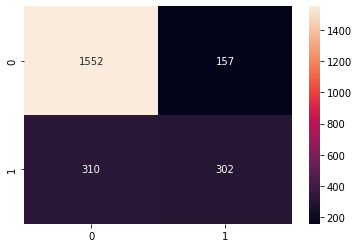

In [57]:
sns.heatmap(conf,annot =True,fmt = 'd')
plt.show()